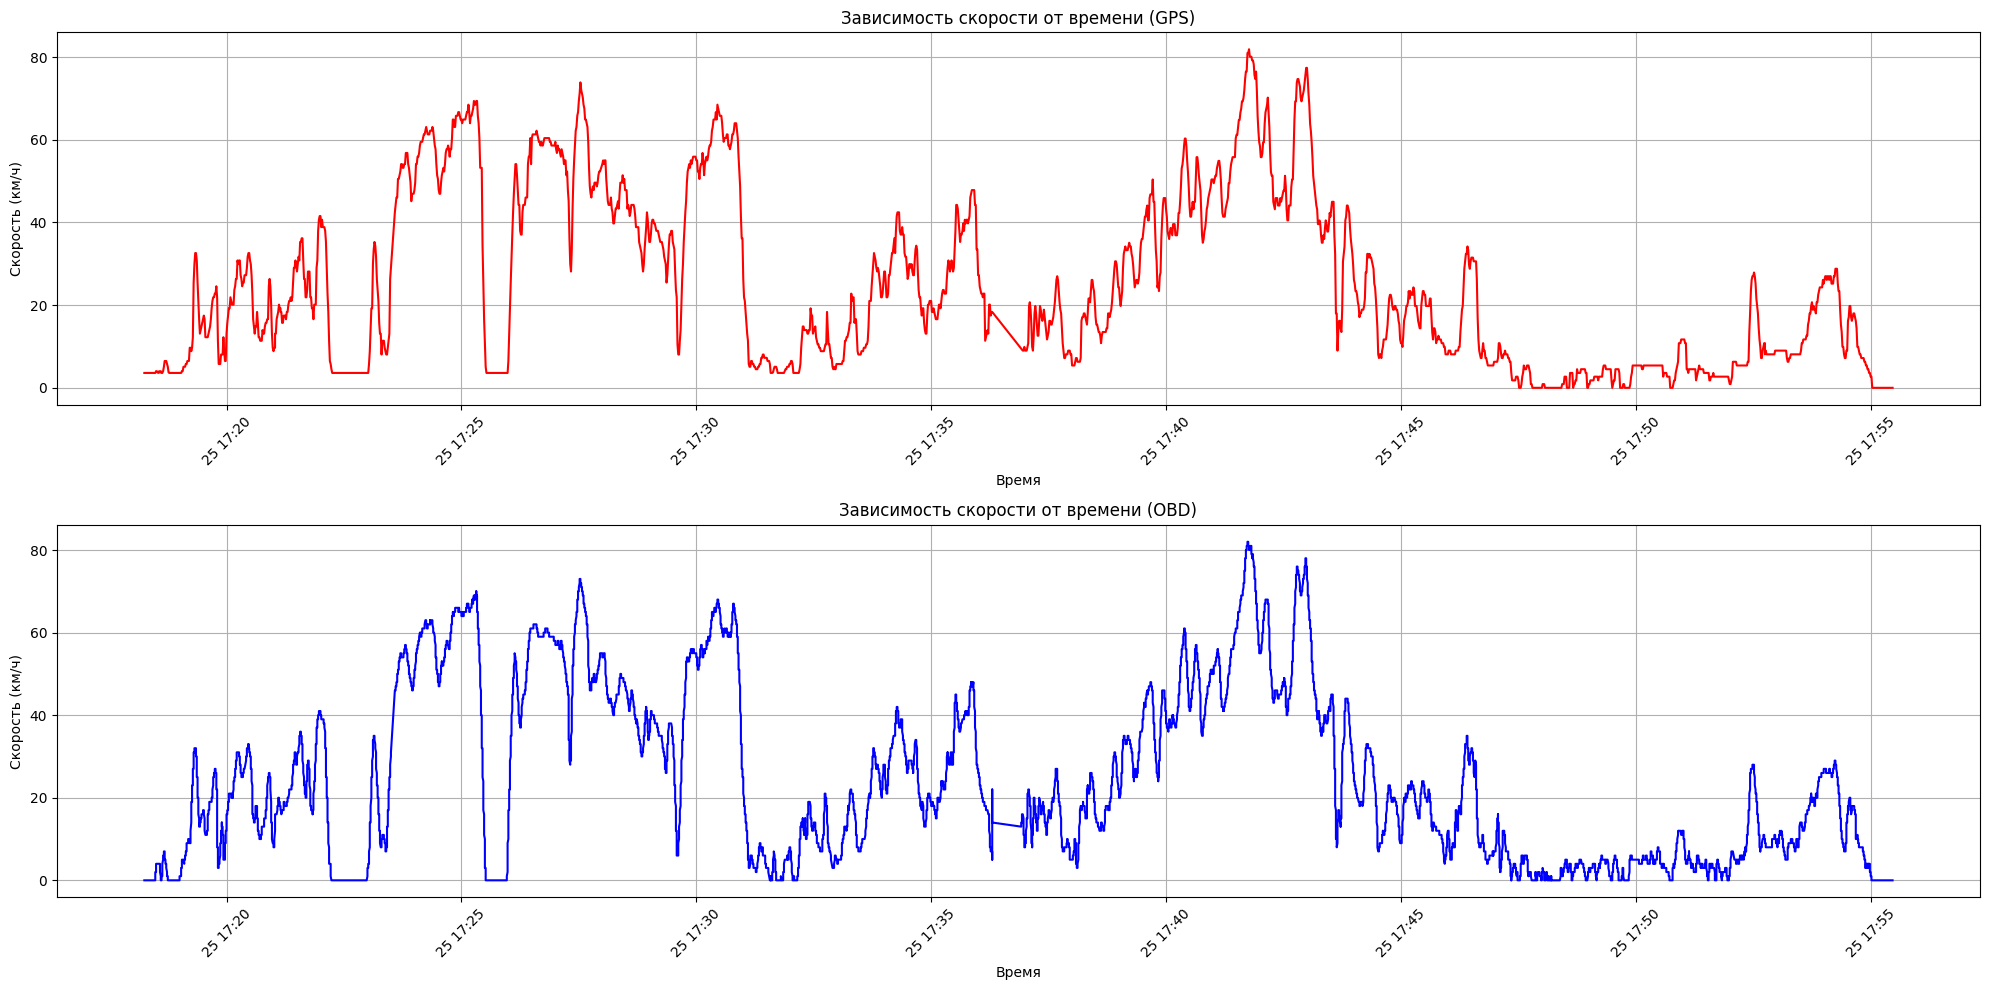

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Считываем данные из файла Excel
df = pd.read_excel("C:/Учоба/снар 3.xlsx")

# Преобразуем столбец "GPS Time" в формат datetime
df['GPS Time'] = pd.to_datetime(df['GPS Time'], format='%a %b %d %H:%M:%S GMT%z %Y')

# Преобразуем столбец 'Speed (GPS)(km/h)' в целочисленный тип данных, игнорируя значения "-"
df['Speed (GPS)(km/h)'] = pd.to_numeric(df['Speed (GPS)(km/h)'], errors='coerce')

# Преобразуем столбец 'Speed (OBD)(km/h)' в целочисленный тип данных, игнорируя значения "-"
df['Speed (OBD)(km/h)'] = pd.to_numeric(df['Speed (OBD)(km/h)'], errors='coerce')

# Удаляем строки с некорректными значениями скорости для GPS
df_gps = df.dropna(subset=['Speed (GPS)(km/h)'])

# Удаляем строки с некорректными значениями скорости для OBD
df_obd = df.dropna(subset=['Speed (OBD)(km/h)'])

# Устанавливаем размер графика
plt.figure(figsize=(20, 10))  # Устанавливаем размер графика (ширина, высота)

# Строим график для GPS
plt.subplot(2, 1, 1)  # Создаем первый подграфик
plt.plot(df_gps['GPS Time'], df_gps['Speed (GPS)(km/h)'], color='red')  # Указываем красный цвет
plt.xlabel('Время')
plt.ylabel('Скорость (км/ч)')
plt.title('Зависимость скорости от времени (GPS)')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X на 45 градусов для лучшей читаемости
plt.grid(True)  # Включаем сетку

# Строим график для OBD
plt.subplot(2, 1, 2)  # Создаем второй подграфик
plt.plot(df_obd['GPS Time'], df_obd['Speed (OBD)(km/h)'], color='blue')  # Указываем синий цвет
plt.xlabel('Время')
plt.ylabel('Скорость (км/ч)')
plt.title('Зависимость скорости от времени (OBD)')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X на 45 градусов для лучшей читаемости
plt.grid(True)  # Включаем сетку

# Автоматическое выравнивание
plt.tight_layout()

# Отображаем графики
plt.show()
